In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from time import time
from scipy.stats import pearsonr

from harmonic_oscillator import HarmonicOscillator
from debugger import message_checkpoints, matrix_checkpoints, vector_checkpoints

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Latex-like font for plots
# Note: if LaTeX is not installed, do not run this cell
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr10",
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}",
    "font.size": 16})

## Continuous time-independent Schrödinger Equation

In [3]:
# Controls
a=-10
b=10
npts=1000

if a>=b:
    raise TypeError("ERROR: a should be lower than b!")

In [4]:
ho = HarmonicOscillator(a=a, b=b, npts=npts, derivative_order=4)

In [5]:
# Compute analytical and numerical eigenvalues
ana_eigvals = ho.analytical_eigenvalues(k=10)
num_eigvals = ho.numerical_eigenvalues(k=10)

print("Eigenvalues:\n")
for i, j in zip(ana_eigvals, num_eigvals):
    print(f"Analytical value: {i}, numerical value: {j}, difference: {np.abs(i-j)}")

Eigenvalues:

Analytical value: 0.5, numerical value: 0.4999999983273139, difference: 1.6726861007398952e-09
Analytical value: 1.5, numerical value: 1.4999999882884338, difference: 1.1711566161309861e-08
Analytical value: 2.5, numerical value: 2.499999958175039, difference: 4.182496082805187e-08
Analytical value: 3.5, numerical value: 3.4999998946061015, difference: 1.0539389849739678e-07
Analytical value: 4.5, numerical value: 4.499999784205115, difference: 2.1579488507228461e-07
Analytical value: 5.5, numerical value: 5.499999613598833, difference: 3.8640116706289973e-07
Analytical value: 6.5, numerical value: 6.4999993694171, difference: 6.305828996744367e-07
Analytical value: 7.5, numerical value: 7.499999038292895, difference: 9.617071050627146e-07
Analytical value: 8.5, numerical value: 8.499998606863468, difference: 1.3931365323571754e-06
Analytical value: 9.5, numerical value: 9.499998061767839, difference: 1.938232161435849e-06


In [6]:
# Compute analytical and numerical eigenvectors
ana_eigvecs = ho.analytical_eigenvectors(k=10)
num_eigvecs = ho.numerical_eigenvectors(k=10) 

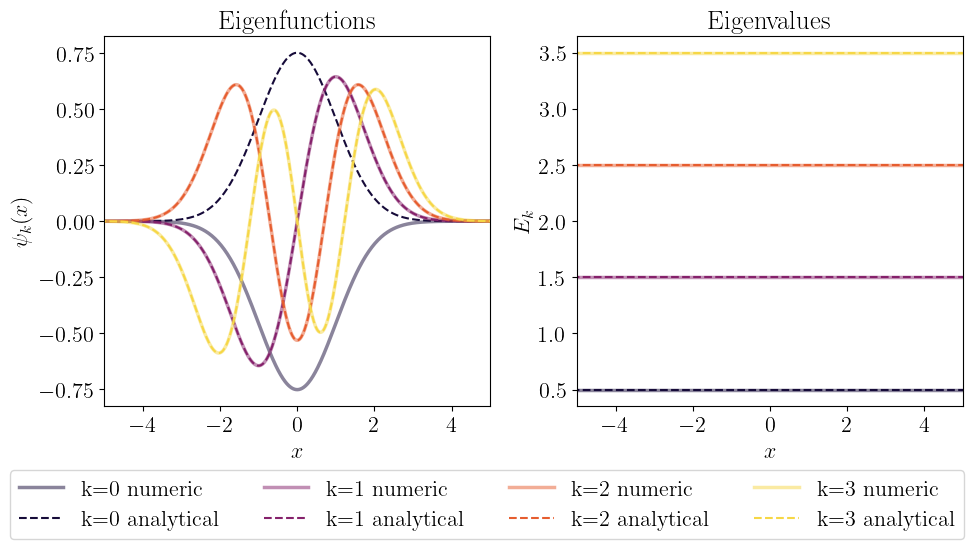

In [7]:
# Eigenfunctions and eigenvalues plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 

cmap = cm.inferno
colors = cmap(np.linspace(0.1, 0.9, 4)) 

all_lines = []
all_labels = []

# Plot
for k in range(4):
    # Eigenfunctions
    l1 = ax[0].plot(ho.x, num_eigvecs[:, k], linewidth=2.5, color=colors[k], alpha=0.5, label=f"k={k} numeric")
    l2 = ax[0].plot(ho.x, ana_eigvecs[:, k], linewidth=1.5, color=colors[k], linestyle="dashed", label=f"k={k} analytical")

    # Eigenvalues
    l3 = ax[1].hlines(num_eigvals[k], xmin=ho.x[0], xmax=ho.x[-1], linewidth=2.5, color=colors[k], alpha=0.5, label=f"k={k} numeric")
    l4 = ax[1].hlines(ana_eigvals[k], xmin=ho.x[0], xmax=ho.x[-1], linewidth=1.5, linestyle="dashed", color=colors[k], label=f"k={k} analytical")
    
    all_lines += l1 + l2  

ax[0].set_xlim(-5, 5)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$\psi_k(x)$")
ax[0].set_title(r"Eigenfunctions")

ax[1].set_xlim(-5, 5)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$E_k$")
ax[1].set_title(r"Eigenvalues")


# Global legend at bottom center
fig.legend(all_lines,
           [line.get_label() for line in all_lines],
           loc="lower center",
           ncol=4,
           bbox_to_anchor=(0.5, -0.13))

plt.tight_layout()
plt.savefig("ho_analytical_eigenfunctions.pdf", dpi=300, bbox_inches="tight")
plt.show()

Check the eigenvalues and eigenvectors errors for different values of k and npoints

In [8]:
kmax = 99
npts_list = [100, 500, 1000, 3000]

# Dictionaries to store the results
eigval_err2 = {}
eigval_err4 = {}
eigvec_err2 = {}
eigvec_err4 = {}

for npts in npts_list:

    if kmax >= npts:
        print(f"Skipping calculation for npts={npts} (K_MAX={K_MAX} is too large).")
        continue

    # Define Harmonic Oscillator instances
    ho2 = HarmonicOscillator(a=a, b=b, npts=npts, derivative_order=2)
    ho4 = HarmonicOscillator(a=a, b=b, npts=npts, derivative_order=4)


    # Compute eigenvalues errors
    errors_full_2 = ho2.eigenvalue_relative_errors(k=kmax)
    eigval_err2[npts] = errors_full_2

    errors_full_4 = ho4.eigenvalue_relative_errors(k=kmax)
    eigval_err4[npts] = errors_full_4

    # Compute eigenvectors errors
    errors_vec_full_2 = ho2.eigenvector_cosine_errors(k=kmax)
    eigvec_err2[npts] = errors_vec_full_2   

    errors_vec_full_4 = ho4.eigenvector_cosine_errors(k=kmax)      
    eigvec_err4[npts] = errors_vec_full_4

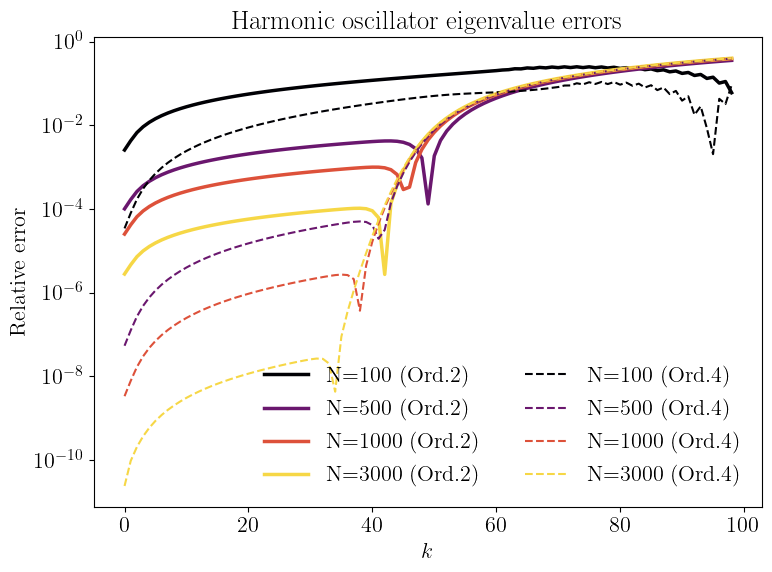

In [9]:
# Plot 
fig, ax = plt.subplots(figsize=(8,6))

cmap = cm.inferno
npts_values_to_plot = sorted(list(set(npts_list) & set(eigval_err2.keys()))) 
colors = cmap(np.linspace(0, 0.9, len(npts_values_to_plot)))

# Map npts to a specific color from the cmap
color_map = {npts: colors[i] for i, npts in enumerate(npts_values_to_plot)}

# Plot Order 2
for npts in npts_list:
    if npts in eigval_err2:
        errors = eigval_err2[npts]
        k_indices = np.arange(len(errors))
        ax.plot(k_indices, errors, label=f"N={npts} (Ord.2)", linestyle="solid", color=color_map[npts], linewidth=2.5, alpha=1)

# Plot Order 4
for npts in npts_list:
    if npts in eigval_err4:
        errors = eigval_err4[npts]
        k_indices = np.arange(len(errors))
        ax.plot(k_indices, errors, label=f"N={npts} (Ord.4)", linestyle="dashed", color=color_map[npts], linewidth=1.5, alpha=1)  
    
ax.set_yscale("log")
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"Relative error")
ax.set_title("Harmonic oscillator eigenvalue errors")
ax.legend(frameon=False, ncol=2)

plt.tight_layout()
plt.savefig("eigenvalue_errors_plot.pdf")
plt.show()

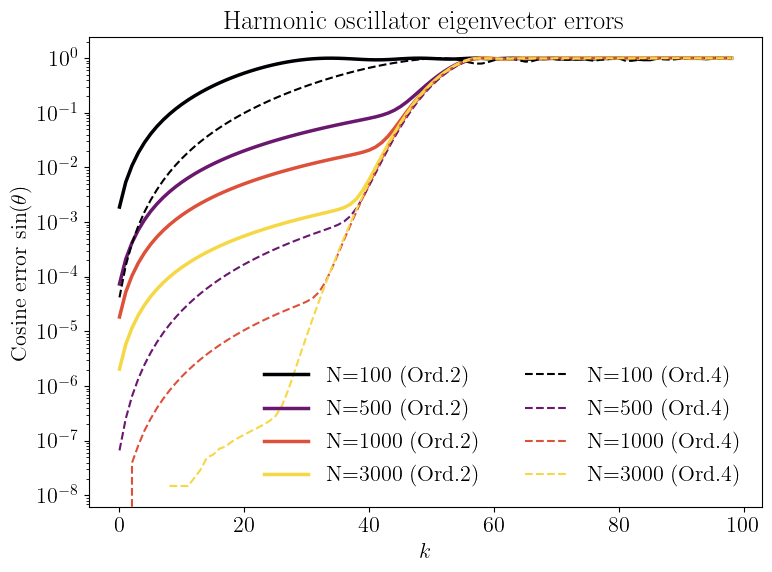

In [10]:
# Plot the cosine similarity to compare eigenvectors
cmap = cm.inferno
npts_values_to_plot = sorted(list(set(npts_list) & set(eigval_err2.keys()))) 
colors = cmap(np.linspace(0, 0.9, len(npts_values_to_plot)))

# Map npts to a specific color from the cmap
color_map = {npts: colors[i] for i, npts in enumerate(npts_values_to_plot)}
fig, ax = plt.subplots(figsize=(8,6))

# Plot Order 2
for npts in npts_list:
    if npts in eigvec_err2:
        errors = eigvec_err2[npts]
        k_indices = np.arange(len(errors))
        ax.plot(k_indices, errors, label=f"N={npts} (Ord.2)", linestyle="-", color=color_map[npts], linewidth=2.5, alpha=1)

# Plot Order 4
for npts in npts_list:
    if npts in eigvec_err4:
        errors = eigvec_err4[npts]
        k_indices = np.arange(len(errors))
        ax.plot(k_indices, errors, label=f"N={npts} (Ord.4)", linestyle="--", color=color_map[npts], linewidth=1.5, alpha=1)
        
ax.set_yscale("log")
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"Cosine error $\sin(\theta)$")
ax.set_title("Harmonic oscillator eigenvector errors")
ax.legend(frameon=False, ncol=2)

plt.tight_layout()
plt.savefig("eigenvector_errors_plot.pdf")
plt.show()

In [11]:
# Compute the execution time for diagonalization
time2 = {}
time4 = {}
npts_list = [100, 200, 500, 1000, 2000, 3000, 5000, 7000, 10000]

message_checkpoints(0, "Diagonalizing matrices...")
for npts in npts_list:
    print(f"Diagonalizing for npts={npts}")
    if kmax >= npts:
        print(f"Skipping calculation for npts={npts}. k must be lower than npts.")
        continue

    # Define Harmonic Oscillator instances
    ho2 = HarmonicOscillator(a=a, b=b, npts=npts, derivative_order=2)
    ho4 = HarmonicOscillator(a=a, b=b, npts=npts, derivative_order=4)

    # Store the times for diagonalization
    start_time2 = time()
    ho2.eigenproblem(k=kmax)
    end_time2 = time()
    time2[npts] = end_time2 - start_time2

    start_time4 = time()
    ho4.eigenproblem(k=kmax)
    end_time4 = time()
    time4[npts] = end_time4 - start_time4
message_checkpoints(0, "Diagonalization ended.")

Diagonalizing matrices...
Diagonalizing for npts=100
Diagonalizing for npts=200
Diagonalizing for npts=500
Diagonalizing for npts=1000
Diagonalizing for npts=2000
Diagonalizing for npts=3000
Diagonalizing for npts=5000
Diagonalizing for npts=7000
Diagonalizing for npts=10000
Diagonalization ended.


In [12]:
# Compute line parameters
a2, b2 = np.polyfit(np.log(list(time2.keys())), np.log(list(time2.values())), deg=1)
p2, cov2 = np.polyfit(np.log(list(time2.keys())), np.log(list(time2.values())), deg=1, cov=True)
r2 = pearsonr(np.log(list(time2.keys())), np.log(list(time2.values())))

a4, b4 = np.polyfit(np.log(list(time4.keys())), np.log(list(time4.values())), deg=1)
p4, cov4 = np.polyfit(np.log(list(time4.keys())), np.log(list(time4.values())), deg=1, cov=True)
r4 = pearsonr(np.log(list(time4.keys())), np.log(list(time4.values())))

# Convert values for log-log plot
N_all = np.array(sorted(list(set(time2.keys()) & set(time4.keys()))))
T_2 = np.array([time2[n] for n in N_all])
T_4 = np.array([time4[n] for n in N_all])

N_fit = np.logspace(np.log10(N_all.min()), np.log10(N_all.max()), 100) 
T_fit_2 = np.exp(b2) * N_fit**a2
T_fit_4 = np.exp(b4) * N_fit**a4

In [13]:
# Look at the Pearson coefficients
print(r2)
print(r4)

PearsonRResult(statistic=np.float64(0.9943684732776433), pvalue=np.float64(4.3888259784831846e-08))
PearsonRResult(statistic=np.float64(0.9964738159555593), pvalue=np.float64(8.54308360834192e-09))


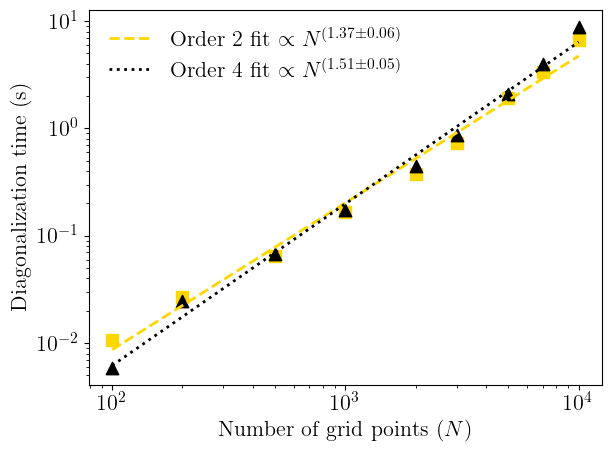

In [14]:
# Plot the execution time
npts_all = sorted(list(set(time2.keys()) & set(time4.keys())))
N_2 = np.array(npts_all)
T_2 = np.array([time2[n] for n in N_2])
N_4 = np.array(npts_all)
T_4 = np.array([time4[n] for n in N_4])

# Plot
fig, ax = plt.subplots()
plt.yscale("log")
plt.xscale("log")

# Plot Order 2 
for npts in N_2:
    ax.scatter(npts, time2[npts], marker="s", color="gold", s=80)
ax.plot(N_fit, T_fit_2, linestyle="dashed", color="gold", linewidth=2, 
        label=r"Order 2 fit $\propto N^{(" + f"{a2:.2f}" + r" \pm " + f"{np.sqrt(cov2[0,0]):.2f}" + r")}$")
    
# Plot Order 4 
for npts in N_4:
    ax.scatter(npts, time4[npts], marker="^", color="black", s=80)
ax.plot(N_fit, T_fit_4, linestyle="dotted", color="black", linewidth=2, 
        label=r"Order 4 fit $\propto N^{(" + f"{a4:.2f}" + r" \pm " + f"{np.sqrt(cov4[0,0]):.2f}" + r")}$")


ax.set_xlabel(r"Number of grid points ($N$)")
ax.set_ylabel(r"Diagonalization time (s)")
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig("time_plot.pdf")
plt.show()